<a href="https://colab.research.google.com/github/sherlyazkiah/AlgoritmadanStrukturData/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

Convolution

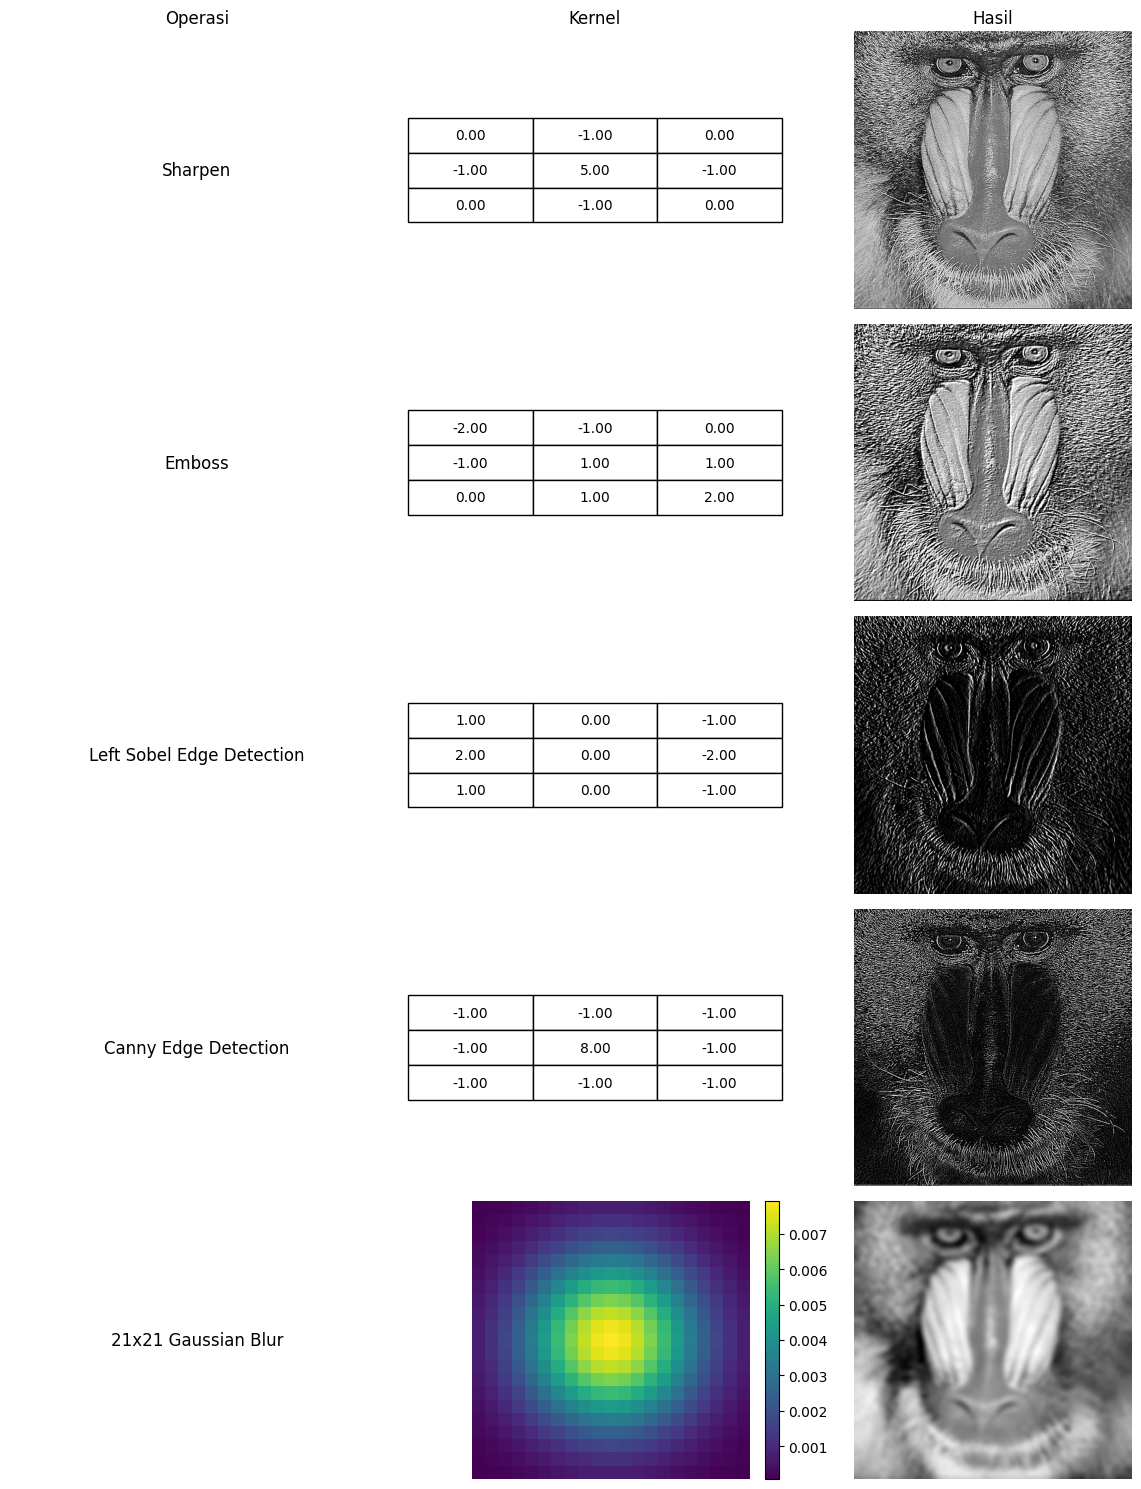

In [ ]:
# Helper: convolution wrapper
def convolution2d(img, kernel):
    # ensure kernel is float32
    k = np.array(kernel, dtype=np.float32)
    return cv.filter2D(img, -1, k)

# Helper: pretty kernel plot
def plot_kernel(ax, kernel):
    k = np.array(kernel, dtype=np.float32)
    ax.axis("off")
    max_dim = max(k.shape)
    if k.size <= 25:  # small kernel -> show as table of values
        # format numbers
        cell_text = [[f"{val:.2f}" for val in row] for row in k]
        table = ax.table(cellText=cell_text, loc="center", cellLoc="center")
        table.scale(1, 1.5)
    else:  # large kernel -> show heatmap
        im = ax.imshow(k, cmap="viridis", interpolation="nearest")
        ax.set_xticks([])
        ax.set_yticks([])
        # add colorbar
        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

# Load image (grayscale)
img_path = '/content/drive/MyDrive/PCVK/Images/mandrill.tiff'
img = cv.imread(img_path)
if img is None:
    raise FileNotFoundError(f"Cannot find image at: {img_path}")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Define kernels
kernelS = np.array([[0, -1,  0],
                    [-1, 5, -1],
                    [0, -1,  0]], dtype=np.float32)

kernelE = np.array([[-2, -1, 0],
                    [-1,  1, 1],
                    [0,   1, 2]], dtype=np.float32)

kernelLSED = np.array([[1, 0, -1],
                       [2, 0, -2],
                       [1, 0, -1]], dtype=np.float32)

kernelCED = np.array([[-1, -1, -1],
                      [-1,  8, -1],
                      [-1, -1, -1]], dtype=np.float32)

kernel_size = 21
sigma = math.sqrt(kernel_size)
g_col = cv.getGaussianKernel(kernel_size, sigma).astype(np.float32)   # column vector
gauss_kernel = (g_col @ g_col.T).astype(np.float32)                  # 2D 21x21 kernel

# Apply filters
sharpened     = convolution2d(img_gray, kernelS)
embossed      = convolution2d(img_gray, kernelE)
sobel_left    = convolution2d(img_gray, kernelLSED)
canny_like    = convolution2d(img_gray, kernelCED)
gaussian_blur = convolution2d(img_gray, gauss_kernel)

# Prepare table data
titles = ["Sharpen", "Emboss", "Left Sobel Edge Detection",
          "Canny Edge Detection", "21x21 Gaussian Blur"]

kernels = [kernelS, kernelE, kernelLSED, kernelCED, gauss_kernel]
results = [sharpened, embossed, sobel_left, canny_like, gaussian_blur]

# Plot Operasi | Kernel | Hasil
# -------------------------
n = len(results)
fig, axes = plt.subplots(nrows=n, ncols=3, figsize=(12, 3*n))

for i in range(n):
    # Column 0: Operation name
    ax0 = axes[i, 0]
    ax0.axis("off")
    ax0.text(0.5, 0.5, titles[i], fontsize=12, ha="center", va="center")
    if i == 0:
        ax0.set_title("Operasi")

    # Column 1: Kernel (table or heatmap)
    ax1 = axes[i, 1]
    plot_kernel(ax1, kernels[i])
    if i == 0:
        ax1.set_title("Kernel")

    # Column 2: Result image
    ax2 = axes[i, 2]
    ax2.imshow(results[i], cmap="gray")
    ax2.axis("off")
    if i == 0:
        ax2.set_title("Hasil")

plt.tight_layout()
plt.show()